# Data Exploration, Cleaning and Wrangling

This Jupyter Notebook explores the dataset and gathers some insights. While exploring the data, data is also cleaned and wrangled.

### Import libraries and load data

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from datetime import datetime


In [2]:
# load csv into pandas dataframe, set headers as list defined above
df = pd.read_csv('auctions_new.csv')

In [3]:
# check if the data import worked by looking at the first 5 rows and the headers
df.head()

id  SEQ.                 Usina   size  Number Tipo Delivery date  \
0   1     1  UHE Foz do Rio Claro  0.091      11  A-5          2010   
1   2     2          UHE São José  0.091      11  A-5          2010   
2   3     3    UHE Passo São João  0.091      11  A-5          2010   
3   4     4         UHE Simplício  0.091      11  A-5          2010   
4   5     5      UHE Retiro Baixo  0.091      11  A-5          2010   

          Leilao  Potencia  Garantia\nFísica (MWmédio)  ...  price_US$  \
0  Leilão 2/2005      68.4                        41.0  ...  46.172913   
1  Leilão 2/2005      51.0                        30.4  ...  49.489294   
2  Leilão 2/2005      77.0                        39.0  ...  48.100346   
3  Leilão 2/2005     337.7                       191.3  ...  49.309800   
4  Leilão 2/2005      82.0                        38.5  ...  49.087568   

     inv_US$ GDP growth Risk (EMBI+) Gross capital formation (% of GDP)  \
0  120104543   3.202131          398                          17.204883   
1   89314060   3.202131          398                          17.204883   
2  114362101   3.202131          398                          17.204883   
3  616054447   3.202131          398                          17.204883   
4  112149186   3.202131          398                          17.204883   

  FDI (% of GDP) Primary energy consumption (exajoules)        G    exch  \
0       1.733901                                   8.86  84956.3  2.3399   
1       1.733901                                   8.86  84956.3  2.3399   
2       1.733901                                   8.86  84956.3  2.3399   
3       1.733901                                   8.86  84956.3  2.3399   
4       1.733901                                   8.86  84956.3  2.3399   

  inv US$ billion  
0     0.120104543  
1      0.08931406  
2     0.114362101  
3     0.616054447  
4     0.112149186  

[5 rows x 28 columns]

### Some data cleaning steps

In [4]:
# checking the datatypes
df.dtypes

id                                          int64
SEQ.                                        int64
Usina                                      object
size                                      float64
Number                                      int64
Tipo                                       object
Delivery date                              object
Leilao                                     object
Potencia                                  float64
Garantia\nFísica (MWmédio)                float64
Lotes Vendidos                            float64
Preço (R$/MW)                             float64
Localização                                object
Fonte                                      object
Mod.                                       object
Invest. Previsto  (R$)                     object
empresa_consorcio                          object
Year                                        int64
price_US$                                 float64
inv_US$                                    object


In [5]:
# check the incidence of nan values
df.isna().sum()

id                                        0
SEQ.                                      0
Usina                                     0
size                                      0
Number                                    0
Tipo                                      0
Delivery date                             0
Leilao                                    0
Potencia                                  0
Garantia\nFísica (MWmédio)                0
Lotes Vendidos                            0
Preço (R$/MW)                             0
Localização                               0
Fonte                                     0
Mod.                                      0
Invest. Previsto  (R$)                    1
empresa_consorcio                         0
Year                                      0
price_US$                                 0
inv_US$                                   0
GDP growth                                0
Risk (EMBI+)                              0
Gross capital formation (% of GD

In [6]:
# Dropping nan values
df = df.dropna()

In [7]:
# See if that has worked
df.isna().sum()

id                                        0
SEQ.                                      0
Usina                                     0
size                                      0
Number                                    0
Tipo                                      0
Delivery date                             0
Leilao                                    0
Potencia                                  0
Garantia\nFísica (MWmédio)                0
Lotes Vendidos                            0
Preço (R$/MW)                             0
Localização                               0
Fonte                                     0
Mod.                                      0
Invest. Previsto  (R$)                    0
empresa_consorcio                         0
Year                                      0
price_US$                                 0
inv_US$                                   0
GDP growth                                0
Risk (EMBI+)                              0
Gross capital formation (% of GD

In [8]:
# lets take a look at the missing rows and the datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1286 entries, 0 to 1286
Data columns (total 28 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   id                                      1286 non-null   int64  
 1   SEQ.                                    1286 non-null   int64  
 2   Usina                                   1286 non-null   object 
 3   size                                    1286 non-null   float64
 4   Number                                  1286 non-null   int64  
 5   Tipo                                    1286 non-null   object 
 6   Delivery date                           1286 non-null   object 
 7   Leilao                                  1286 non-null   object 
 8   Potencia                                1286 non-null   float64
 9   Garantia
Física (MWmédio)               1286 non-null   float64
 10  Lotes Vendidos                          1286 non-null   floa

In [9]:
# now we look at the unique values for each row
for c in df.columns.tolist():       #iterate over a list of the columns  
    print(c, len(df[c].unique()))   #print the colum header and the unique values

id 1286
SEQ. 119
Usina 1272
size 28
Number 32
Tipo 9
Delivery date 20
Leilao 44
Potencia 298
Garantia
Física (MWmédio) 480
Lotes Vendidos 378
Preço (R$/MW) 679
Localização 184
Fonte 42
Mod. 4
Invest. Previsto  (R$) 835
empresa_consorcio 806
Year 15
price_US$ 728
inv_US$ 850
GDP growth 15
Risk (EMBI+) 15
Gross capital formation (% of GDP) 15
FDI (% of GDP) 15
Primary energy consumption (exajoules) 13
G 15
exch 15
inv US$ billion 850


In [10]:
# Dropping columns that currently provide no value or that are expressed in Brazilian currency (R$)
df.drop(['SEQ.', 'Tipo', 'Delivery date', 'Mod.', 'Preço (R$/MW)', 'Invest. Previsto  (R$)'], axis=1, inplace=True)
# check if that worked
df.head(1)

id                 Usina   size  Number         Leilao  Potencia  \
0   1  UHE Foz do Rio Claro  0.091      11  Leilão 2/2005      68.4   

   Garantia\nFísica (MWmédio)  Lotes Vendidos            Localização Fonte  \
0                        41.0            41.0  Caçú e São Simão / GO  Água   

   ...  price_US$    inv_US$  GDP growth Risk (EMBI+)  \
0  ...  46.172913  120104543    3.202131          398   

   Gross capital formation (% of GDP)  FDI (% of GDP)  \
0                           17.204883        1.733901   

   Primary energy consumption (exajoules)        G    exch  inv US$ billion  
0                                    8.86  84956.3  2.3399      0.120104543  

[1 rows x 22 columns]

In [11]:
# Translating column names into english and making their names sensible
df2 = df.rename(columns={ 'Usina':'plant','Unnamed: 2':'size', 'Number':'number', 'Leilao': 'auction', 'Potencia':'capacity', 'Garantia\nFísica (MWmédio)':'physical_guarantee', 'Lotes Vendidos':'sold_lots', 'Localização':'location', 'Fonte':'source', 'Year': 'year', 'empresa_consorcio':'company_consortium', 
                        'GDP growth': 'gdp_growth', 'Risk (EMBI+)': 'risk_embi', 'Gross capital formation (% of GDP)': 'gkf', 'FDI (% of GDP)': 'fdi', 'Primary energy consumption (exajoules)': 'primary_energy_consumption', 'G': 'g', 'inv US$ billion': 'inv_US$_billion'
                        })
# check if that worked
df2.head(1)

id                 plant   size  number        auction  capacity  \
0   1  UHE Foz do Rio Claro  0.091      11  Leilão 2/2005      68.4   

   physical_guarantee  sold_lots               location source  ...  \
0                41.0       41.0  Caçú e São Simão / GO   Água  ...   

   price_US$    inv_US$  gdp_growth risk_embi        gkf       fdi  \
0  46.172913  120104543    3.202131       398  17.204883  1.733901   

   primary_energy_consumption        g    exch  inv_US$_billion  
0                        8.86  84956.3  2.3399      0.120104543  

[1 rows x 22 columns]

#### Treating the "source" column

In [12]:
#step 1: find what are the most common value in the column using value counts()
df2['source'].value_counts()


Vento                                                                       599
VENTO                                                                       147
hidro                                                                       144
Sol                                                                          94
bagaco                                                                       67
SOL                                                                          49
Água                                                                         33
Bagaço de Cana                                                               23
Óleo Combustível                                                             21
SOLAR                                                                        17
BAGAÇO DE CANA                                                               12
cavaco                                                                       12
Gás Natural                             

In [13]:
# Step 2: replacing the various different category names with only 9
df2 = df2.replace(to_replace={'Água':'hydro', 'Vento': 'wind', 'VENTO': 'wind', 'hidro': 'hydro', 'Sol': 'solar', 
                               'SOL': 'solar', 'Bagaço de Cana-de-Açúcar': 'sugar cane bagasse', 'Bagaço de Cana': 'sugar cane bagasse',
'Óleo Combustível': 'fuel oil', 'SOLAR': 'solar', 'BAGAÇO DE CANA': 'sugar cane bagasse', 'Gás Natural': 'natural gas', 'GÁS NATURAL': 'natural gas',
'Cavaco de Madeira': 'biomass', 'Óleo Combustível B1\nAlternativo: Óleo Diesel': 'fuel oil', 'BAGAÇO DE CANA': 'sugar cane bagasse',
'UTE': 'natural gas', 'Óleo Combustível Especial B1\nAlternativo:  Óleo Diesel': 'fuel oil', 'Bagaço de Cana-de-Açúcar \n(Alternativo: resíduos agrícolas)': 'sugar cane bagasse',
'Carvão Mineral': 'coal', 'Óleo Diesel': 'diesel oil', 'Óleo combustível B1 especial': 'fuel oil', 'Cavaco / Resíduo de Madeira': 'biomass',
'Óleo Combustível B1': 'fuel oil', 'Óleo Diesel\n(Alternativo: Biodiesel)': 'diesel oil', 'Cavaco/Resíduo de Madeira': 'biomass',
'Gas Natural': 'natural gas', 'Óleo OCB1\nAlternativo: Óleo Diesel': 'fuel oil', 'Bagaço de Cana-de-Açúcar \n(Alternativo: cavaco de madeira)': 'sugar cane bagasse',
'Gás de Processo e Vapor de Processo': 'others', 'CAVACO \nRESÍDUO DE MADEIRA': 'biomass', 'Gás Natural Liquefeito': 'natural gas',
'Bagaço de Cana-de-Açúcar\n(Alternativo: palha e ponta de cana-de-açúcar)': 'sugar cane bagasse', 'Bagaço de Cana-de-Açúcar': 'sugar cane bagasse',
'VERDE': 'biomass', 'Capim Elefante\n(Alternativo: resíduo de madeira)': 'biomass', 'Biogás': 'biogas', 'Óleo Combustível B1 (especial)\nAlternativo: Óleo Diesel': 'fuel oil',
'Biomassa de Resíduo Sólido Avícola (Alternativo: Resíduos de Madeira)': 'biomass', 'Óleo Combustível 1B': 'fuel oil',
'Cavaco / Resíduo de Madeira': 'biomass', 'Casca de Arroz': 'biomass', 'Carvão Mineral Nacional': 'coal', 'Óleo Combustível B1\nAlternativo: Biodisel e Óleo Diesel': 'fuel oil',
'Gás Natural Regaseificado (a partir de GNL)': 'natural gas', 'Bagaço de Cana-de-Açúcar\n(Alternativo: palha de cana-de-açúcar)': 'sugar cane bagasse',
'Carvão Mineral Importado': 'coal', 'Óleo OCB1': 'fuel oil', 'cavaco': 'biomass', 'bagaco': 'sugar cane bagasse'}, value=None)


In [14]:
# Step 3: Assessing that it has worked (Now it looks much better!)
df2['source'].value_counts()

wind                  746
hydro                 177
solar                 160
sugar cane bagasse    109
fuel oil               40
natural gas            25
biomass                17
diesel oil              5
coal                    5
others                  1
biogas                  1
Name: source, dtype: int64

#### Treating the "location column"

In [15]:
# Step 1: Splitting the column into two: city and state
df2[['city','state']] = df2.location.str.split("/", expand=True,)
df2 = df2.dropna()
df2

id                       plant   size  number         auction  \
0        1        UHE Foz do Rio Claro  0.091      11   Leilão 2/2005   
1        2                UHE São José  0.091      11   Leilão 2/2005   
2        3          UHE Passo São João  0.091      11   Leilão 2/2005   
3        4               UHE Simplício  0.091      11   Leilão 2/2005   
4        5            UHE Retiro Baixo  0.091      11   Leilão 2/2005   
...    ...                         ...    ...     ...             ...   
1282  1283                  BELA VISTA  0.011      90  Leilão 04/2019   
1283  1284                BRANCO PERES  0.011      90  Leilão 04/2019   
1284  1285  IPIRANGA BIOENERGIA MOCOCA  0.011      90  Leilão 04/2019   
1285  1286     SÃO MARTINHO BIOENERGIA  0.011      90  Leilão 04/2019   
1286  1287                    UNIVALEM  0.011      90  Leilão 04/2019   

      capacity  physical_guarantee  sold_lots  \
0        68.40                41.0       41.0   
1        51.00                30.4       30.0   
2        77.00                39.0       37.0   
3       337.70               191.3      185.0   
4        82.00                38.5       36.0   
...        ...                 ...        ...   
1282     64.80                19.5       80.0   
1283      9.62                 5.2       32.0   
1284     40.20                16.0       69.0   
1285     40.00                23.8      202.0   
1286     35.00                14.2      132.0   

                                         location              source  ...  \
0                           Caçú e São Simão / GO               hydro  ...   
1             Salvador das Missões e Rolador / RS               hydro  ...   
2     Dezesseis de Novembro e Roque Gonzales / RS               hydro  ...   
3                      Sapucaia e Três Rios / RJ                hydro  ...   
4                           Curvelo e Pompeu / MG               hydro  ...   
...                                           ...                 ...  ...   
1282                                 nocity / SP   sugar cane bagasse  ...   
1283                                 nocity / SP   sugar cane bagasse  ...   
1284                                 nocity / SP   sugar cane bagasse  ...   
1285                                 nocity / SP   sugar cane bagasse  ...   
1286                                 nocity / SP   sugar cane bagasse  ...   

     gdp_growth  risk_embi        gkf       fdi  primary_energy_consumption  \
0      3.202131        398  17.204883  1.733901                        8.86   
1      3.202131        398  17.204883  1.733901                        8.86   
2      3.202131        398  17.204883  1.733901                        8.86   
3      3.202131        398  17.204883  1.733901                        8.86   
4      3.202131        398  17.204883  1.733901                        8.86   
...         ...        ...        ...       ...                         ...   
1282   1.136586        241  15.112968  3.759959                       12.40   
1283   1.136586        241  15.112968  3.759959                       12.40   
1284   1.136586        241  15.112968  3.759959                       12.40   
1285   1.136586        241  15.112968  3.759959                       12.40   
1286   1.136586        241  15.112968  3.759959                       12.40   

             g    exch  inv_US$_billion  \
0      84956.3  2.3399      0.120104543   
1      84956.3  2.3399       0.08931406   
2      84956.3  2.3399      0.114362101   
3      84956.3  2.3399      0.616054447   
4      84956.3  2.3399      0.112149186   
...        ...     ...              ...   
1282  373043.4  4.0301      0.034813032   
1283  373043.4  4.0301      0.010595271   
1284  373043.4  4.0301       0.01240664   
1285  373043.4  4.0301      0.079520111   
1286  373043.4  4.0301      0.039038979   

                                         city  state  
0                           Caçú e São Simão      GO  
1             Salvador das Mi

In [16]:
# Step 2: removing spaces from cells to avoid double state entries
df2['state'] = df2['state'].str.strip() 
df2['state'].value_counts()

BA    297
RN    209
CE    116
RS    104
PI    102
SP     73
MG     64
PE     56
SC     39
GO     36
PR     30
MT     28
MA     26
PB     26
MS     24
ES     13
TO     11
RO      9
AM      5
PA      4
SE      3
RJ      2
AL      2
AP      2
RR      1
AC      1
Name: state, dtype: int64

In [17]:
# Step 3: dropping the city column (not every winning bid has a corresponding city in the dataset) and checking if it worked
df2.drop(['city', 'location'], axis=1, inplace=True)
df2.head()

id                 plant   size  number        auction  capacity  \
0   1  UHE Foz do Rio Claro  0.091      11  Leilão 2/2005      68.4   
1   2          UHE São José  0.091      11  Leilão 2/2005      51.0   
2   3    UHE Passo São João  0.091      11  Leilão 2/2005      77.0   
3   4         UHE Simplício  0.091      11  Leilão 2/2005     337.7   
4   5      UHE Retiro Baixo  0.091      11  Leilão 2/2005      82.0   

   physical_guarantee  sold_lots source                    company_consortium  \
0                41.0       41.0  hydro                 Alusa Engenharia Ltda   
1                30.4       30.0  hydro                 Alusa Engenharia Ltda   
2                39.0       37.0  hydro                        Eletrosul S.A.   
3               191.3      185.0  hydro       Furnas\nCentrais Elétricas S.A.   
4                38.5       36.0  hydro  Orteng Equipamentos e Sistemas Ltda.   

   ...    inv_US$  gdp_growth risk_embi        gkf       fdi  \
0  ...  120104543    3.202131       398  17.204883  1.733901   
1  ...   89314060    3.202131       398  17.204883  1.733901   
2  ...  114362101    3.202131       398  17.204883  1.733901   
3  ...  616054447    3.202131       398  17.204883  1.733901   
4  ...  112149186    3.202131       398  17.204883  1.733901   

   primary_energy_consumption        g    exch  inv_US$_billion  state  
0                        8.86  84956.3  2.3399      0.120104543     GO  
1                        8.86  84956.3  2.3399       0.08931406     RS  
2                        8.86  84956.3  2.3399      0.114362101     RS  
3                        8.86  84956.3  2.3399      0.616054447     RJ  
4                        8.86  84956.3  2.3399      0.112149186     MG  

[5 rows x 22 columns]

In [18]:
# converting capacity, physical_guarantee, sold_lots and inv_US$ into numeric
df2['capacity'] = pd.to_numeric(df2['capacity'], errors ='coerce')
df2['physical_guarantee'] = pd.to_numeric(df2['physical_guarantee'], errors ='coerce')
df2['sold_lots'] = pd.to_numeric(df2['sold_lots'], errors ='coerce')
df2['inv_US$'] = pd.to_numeric(df2['inv_US$'], errors ='coerce')
df2['state'] = df2['state'].astype(str)

### Creating new statistics

In [19]:
# The first one is average investment size (investment/number of selected plans in an auction)
df2["inv_size"] = df2["inv_US$"]/df2["number"]


In [20]:
# The second one is average physical guarantee size (physical guarantee/number of selected plans in an auction)
df2["physical_guarantee_size"] = df2["physical_guarantee"]/df2["number"]


In [21]:
# The third one is distance from last auction, an indicator of how far in the past the selected bid is
currentYear = datetime.now().year
df2["distance_from_last_auction"] = ((currentYear/df2["year"])-1)*100


In [22]:
# Check if that worked
df2.head()

id                 plant   size  number        auction  capacity  \
0   1  UHE Foz do Rio Claro  0.091      11  Leilão 2/2005      68.4   
1   2          UHE São José  0.091      11  Leilão 2/2005      51.0   
2   3    UHE Passo São João  0.091      11  Leilão 2/2005      77.0   
3   4         UHE Simplício  0.091      11  Leilão 2/2005     337.7   
4   5      UHE Retiro Baixo  0.091      11  Leilão 2/2005      82.0   

   physical_guarantee  sold_lots source                    company_consortium  \
0                41.0       41.0  hydro                 Alusa Engenharia Ltda   
1                30.4       30.0  hydro                 Alusa Engenharia Ltda   
2                39.0       37.0  hydro                        Eletrosul S.A.   
3               191.3      185.0  hydro       Furnas\nCentrais Elétricas S.A.   
4                38.5       36.0  hydro  Orteng Equipamentos e Sistemas Ltda.   

   ...        gkf       fdi  primary_energy_consumption        g    exch  \
0  ...  17.204883  1.733901                        8.86  84956.3  2.3399   
1  ...  17.204883  1.733901                        8.86  84956.3  2.3399   
2  ...  17.204883  1.733901                        8.86  84956.3  2.3399   
3  ...  17.204883  1.733901                        8.86  84956.3  2.3399   
4  ...  17.204883  1.733901                        8.86  84956.3  2.3399   

   inv_US$_billion  state      inv_size  physical_guarantee_size  \
0      0.120104543     GO  1.091859e+07                 3.727273   
1       0.08931406     RS  8.119460e+06                 2.763636   
2      0.114362101     RS  1.039655e+07                 3.545455   
3      0.616054447     RJ  5.600495e+07                17.390909   
4      0.112149186     MG  1.019538e+07                 3.500000   

   distance_from_last_auction  
0                    0.798005  
1                    0.798005  
2                    0.798005  
3                    0.798005  
4                    0.798005  

[5 rows x 25 columns]

In [23]:
# checking the datatypes
df2.dtypes

id                              int64
plant                          object
size                          float64
number                          int64
auction                        object
capacity                      float64
physical_guarantee            float64
sold_lots                     float64
source                         object
company_consortium             object
year                            int64
price_US$                     float64
inv_US$                       float64
gdp_growth                    float64
risk_embi                       int64
gkf                           float64
fdi                           float64
primary_energy_consumption    float64
g                             float64
exch                          float64
inv_US$_billion                object
state                          object
inv_size                      float64
physical_guarantee_size       float64
distance_from_last_auction    float64
dtype: object

### Some preliminary statistic description of the data

In [24]:
# The following table presents a measure of central tendency (mean) and measures of spread/dispersion (standard deviation, quartiles, and range)
df2.describe()

id         size       number      capacity  \
count  1283.000000  1283.000000  1283.000000   1283.000000   
mean    645.193297     0.032246    53.441154     61.207708   
std     371.528833     0.060800    29.517920    355.090286   
min       1.000000     0.008000     1.000000      1.000000   
25%     323.500000     0.015000    29.000000     20.000000   
50%     646.000000     0.020000    51.000000     28.800000   
75%     966.500000     0.033000    66.000000     30.000000   
max    1287.000000     1.000000   119.000000  11233.100000   

       physical_guarantee     sold_lots         year    price_US$  \
count         1283.000000   1283.000000  1283.000000  1283.000000   
mean            32.808363    112.031411  2013.338270    54.913852   
std            169.922658    605.784866     3.453185    18.354162   
min              0.610000      0.100000  2005.000000     0.000000   
25%              8.400000     11.300000  2011.000000    46.722760   
50%             12.200000     20.000000  2013.000000    52.886635   
75%             15.500000     92.000000  2016.000000    69.669843   
max           4571.000000  14500.000000  2019.000000    92.764501   

            inv_US$   gdp_growth    risk_embi          gkf          fdi  \
count  1.281000e+03  1283.000000  1283.000000  1283.000000  1283.000000   
mean   8.013419e+07     1.877332   251.978956    19.055825     3.415724   
std    3.715881e+08     2.951390    57.164353     2.873589     0.591516   
min    5.866350e+05    -3.545763   181.000000    14.630386     1.733901   
25%    3.002576e+07     0.503956   205.000000    15.112968     3.041524   
50%    4.247628e+07     1.322869   231.000000    20.548411     3.571426   
75%    6.083142e+07     3.974425   300.000000    21.693767     3.759959   
max    1.092744e+10     7.528226   398.000000    21.826276     4.145494   

       primary_energy_consumption              g         exch      inv_size  \
count                 1283.000000    1283.000000  1283.000000  1.281000e+03   
mean                    11.665448  267697.531800     2.732272  1.943278e+07   
std                      0.885875   76656.399598     0.833935  3.568038e+08   
min                      8.860000   84956.300000     1.665400  1.430817e+04   
25%                     11.480000  201770.600000     1.875100  5.033589e+05   
50%                     12.130000  264500.800000     2.342000  8.503455e+05   
75%                     12.230000  336893.600000     3.874200  1.413862e+06   
max                     12.400000  373043.400000     4.030100  1.092744e+10   

       physical_guarantee_size  distance_from_last_auction  
count              1283.000000                 1283.000000  
mean                  8.504470                    0.380844  
std                 152.703468                    0.172210  
min                   0.009778                    0.099059  
25%                   0.128992                    0.248016  
50%                   0.230952                    0.397417  
75%                   0.382489                    0.497265  
max                4571.000000                    0.798005

#### Below a correlation matrix of the dataframe is presented


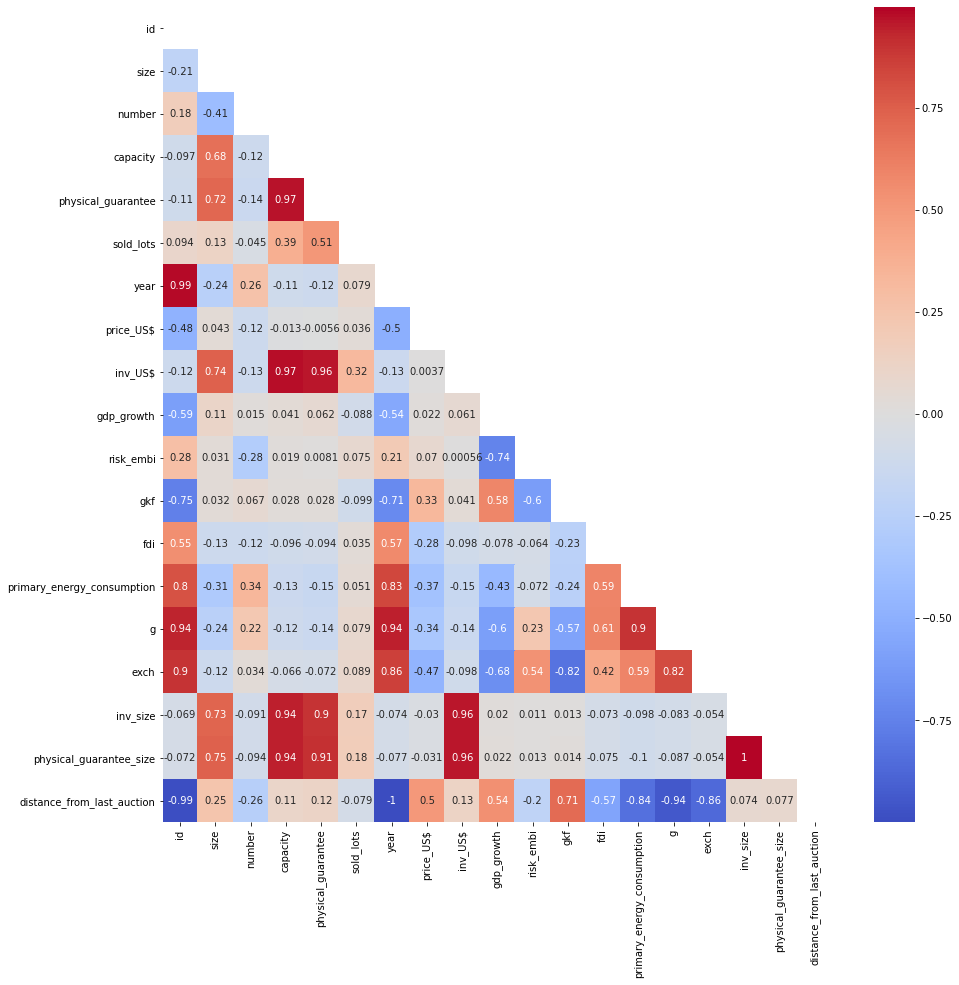

In [25]:
fig, ax = plt.subplots(figsize=(15, 15))

mask=np.zeros_like(df2.corr()) # #uses the mask technique to make the correlation matrix easier to see
mask[np.triu_indices_from(mask)]=True

sns.heatmap(df2.corr(),  
            mask=mask,  # with this, the fields are "deactivated" in the heatmap according to the mask
            annot=True,  # makes sure that the actual values of correlation are shown in the map
            cmap='coolwarm',  # the coolwarm map modality is set
            center=0,  # with this negative correlations are displayed as negatives
           )
plt.show()

#### Important preliminary findings from the heatmap:

- There is strong correlation between all variables related to "physical guarantee" and "investment". For the models, this means that only one should them appear as an independent variable 
- There is also strong correlation between "physical guarantee" and "capacity". The former variable is the most important for Brazil's electric system, so I'll use this one 


***


### A next step is to look at all scatterplots as pairs:
***

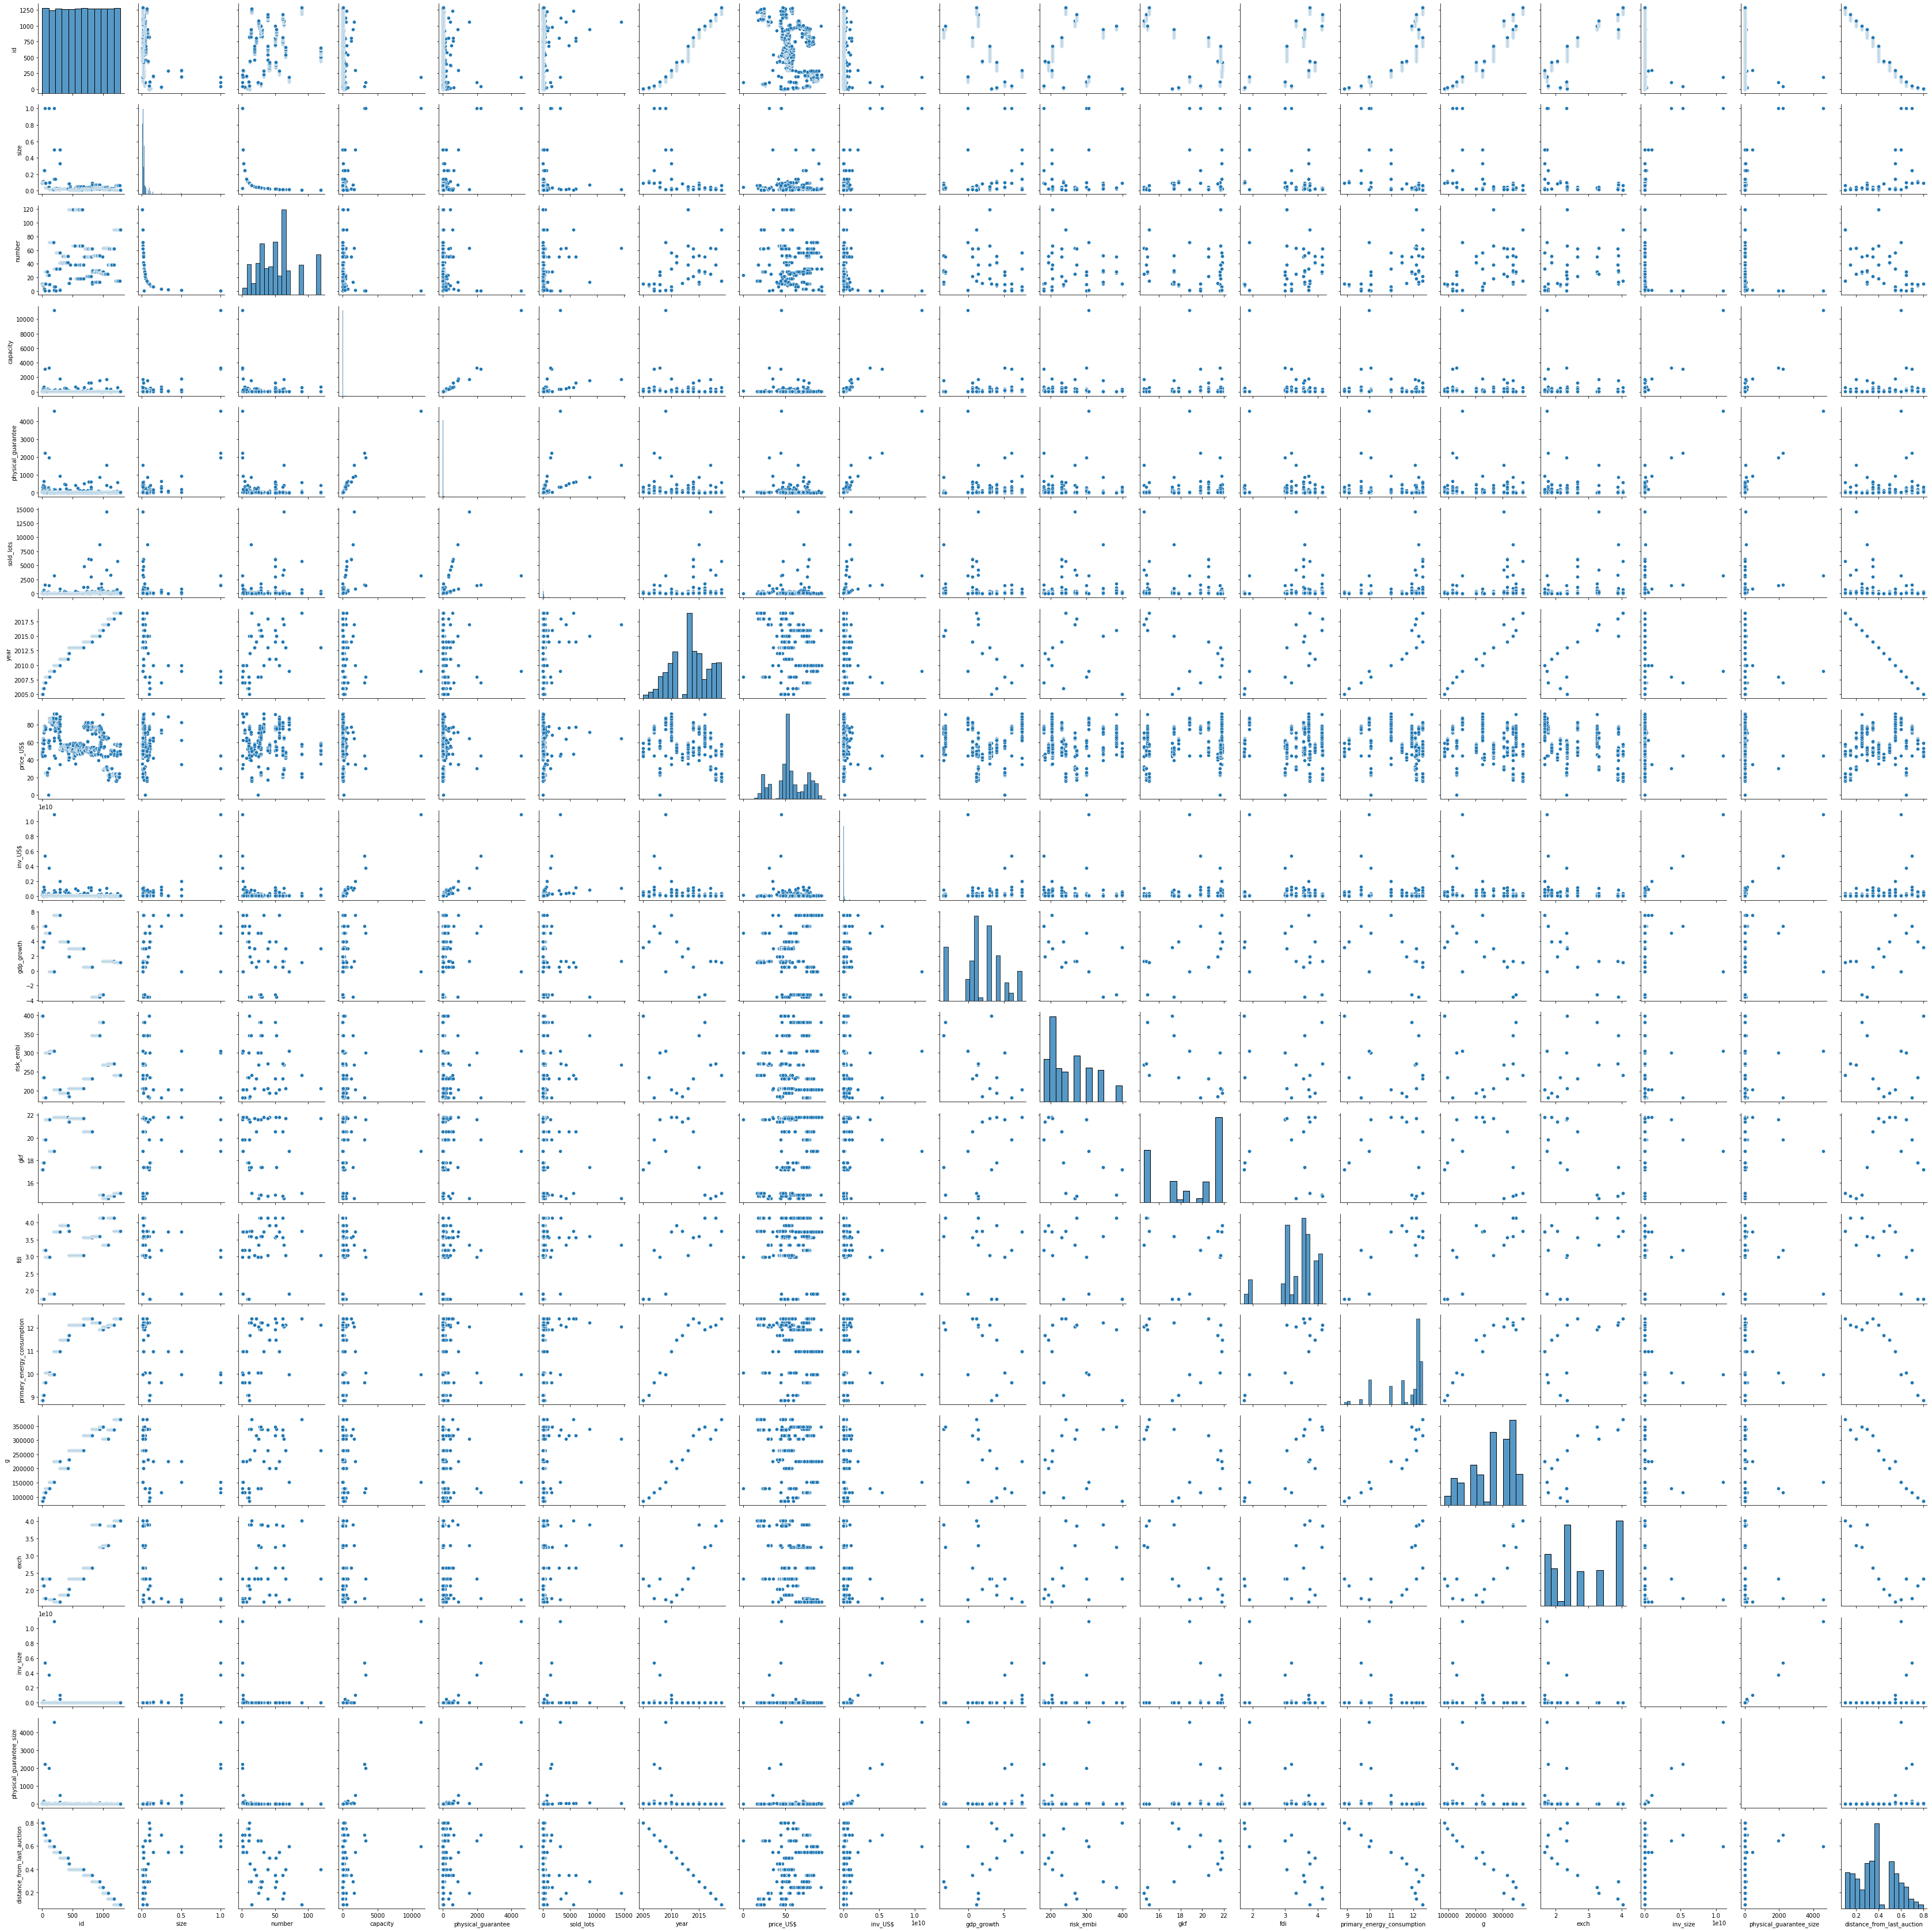

In [26]:
# While it should be noted that is visual impact is appealing, is informative value is much less than the correlation map
sns.pairplot(df2);

### A scatterplot of investments vs price:
***
#### The two next graphs are much more informative. There are three clusters here, in which a low investment level is clustered, respectively, with low, middle and high prices

In [27]:
fig = px.scatter(df2, x="inv_US$", y="price_US$", color_discrete_sequence=px.colors.qualitative.Alphabet) 
fig.show()


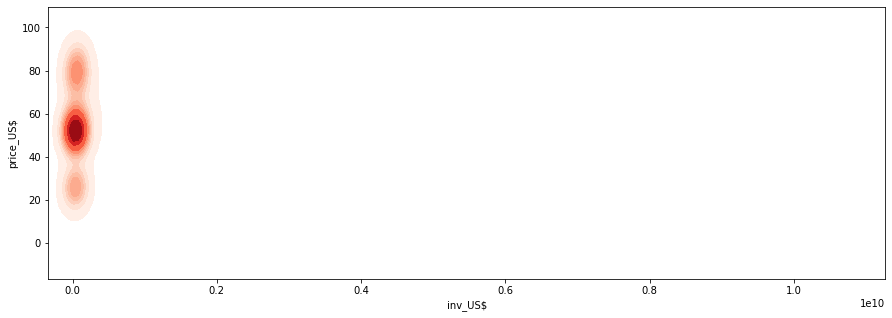

In [28]:
# The same visualization with a kernel density estimate (KDE) plot 
plt.figure(figsize=(15, 5))
sns.kdeplot(data=df2, x="inv_US$", y="price_US$", cmap="Reds", shade=True)
plt.show()

### A scatterplot of physical guarantee vs price
***
#### Because of the correlation between investment and physical guarantee, the same holds for the graphs below

In [29]:
fig = px.scatter(df2, x="physical_guarantee", y="price_US$", color_discrete_sequence=px.colors.qualitative.Dark2)
fig.show()

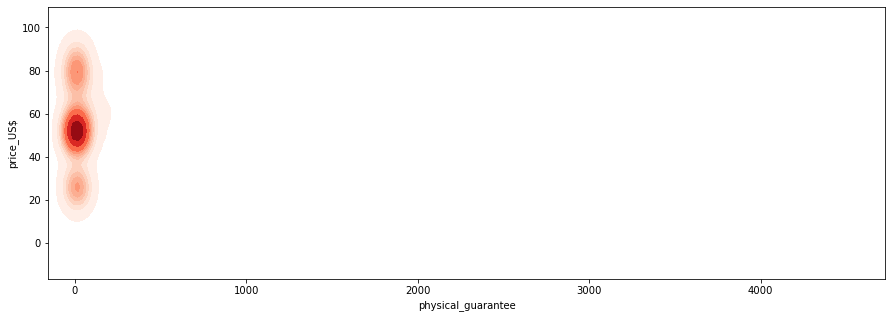

In [30]:
# The same visualization with a kernel density estimate (KDE) plot 
plt.figure(figsize=(15, 5))
sns.kdeplot(data=df2, x="physical_guarantee", y="price_US$", cmap="Reds", shade=True)
plt.show()

### A scatterplot of investments vs physical guarantee
***
#### The correlation between investment and physical guarantee is nicely portrayed below

In [31]:
fig = px.scatter(df2, x="inv_US$", y="physical_guarantee", color_discrete_sequence=px.colors.qualitative.G10)
fig.show()

### This plots shows the distribution of prices
***
#### The three price clusters (low, middle and high) are clearly visualized below

<AxesSubplot:xlabel='price_US$', ylabel='Count'>

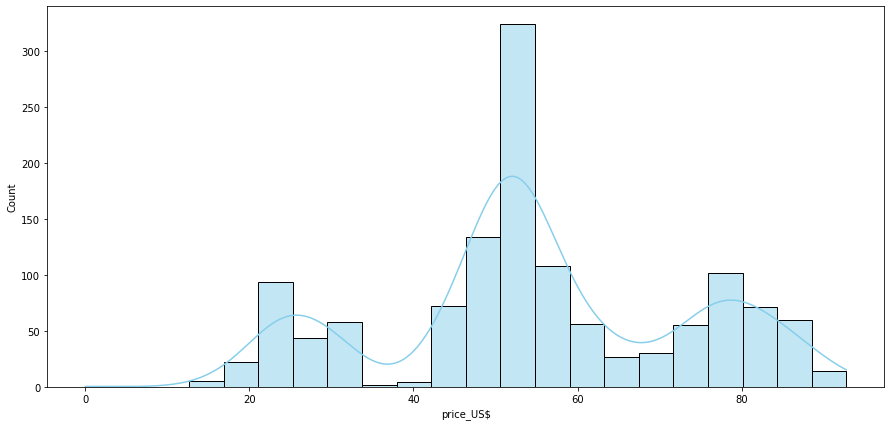

In [32]:
plt.figure(figsize=(15, 7))
sns.histplot(x=df2["price_US$"] , color="skyblue", kde=True)

### This plots shows the distribution of investments (with bins)
***
#### As can be seen, the vast majority of accorded investments per winning bid is concentrated in the first bins

<AxesSubplot:xlabel='inv_US$', ylabel='Count'>

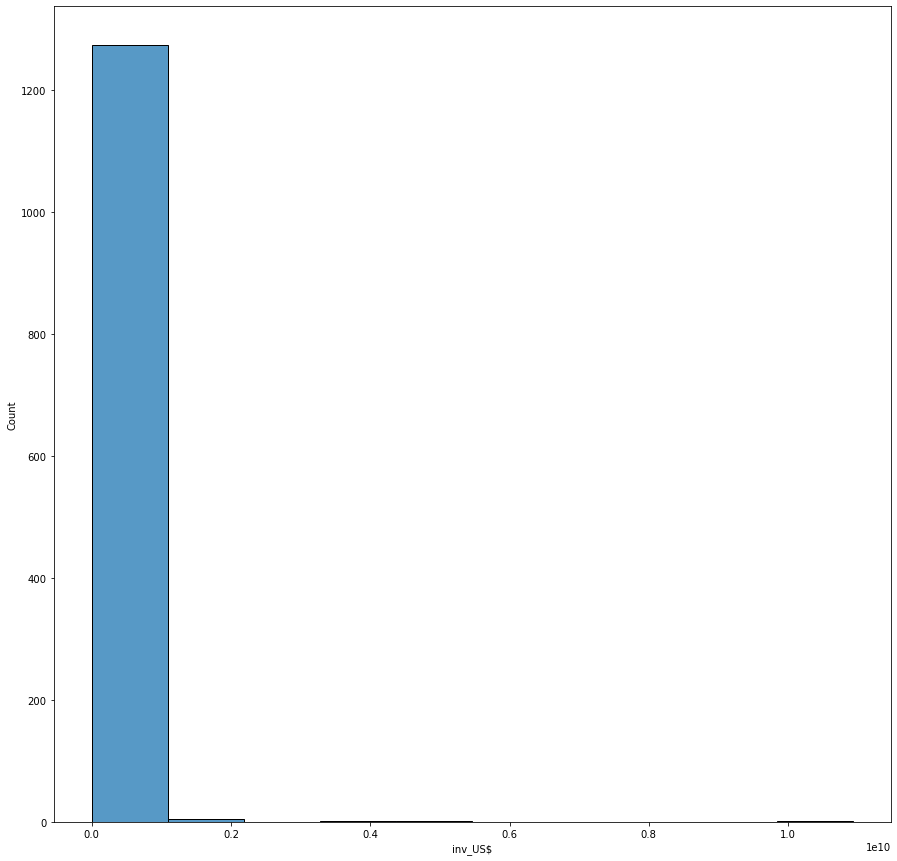

In [33]:
plt.figure(figsize=(15, 15))
sns.histplot(data=df2, x="inv_US$", bins=10)

### This plots shows the distribution of physical guarantees (with bins)
***
#### The same holds for physical guarantees

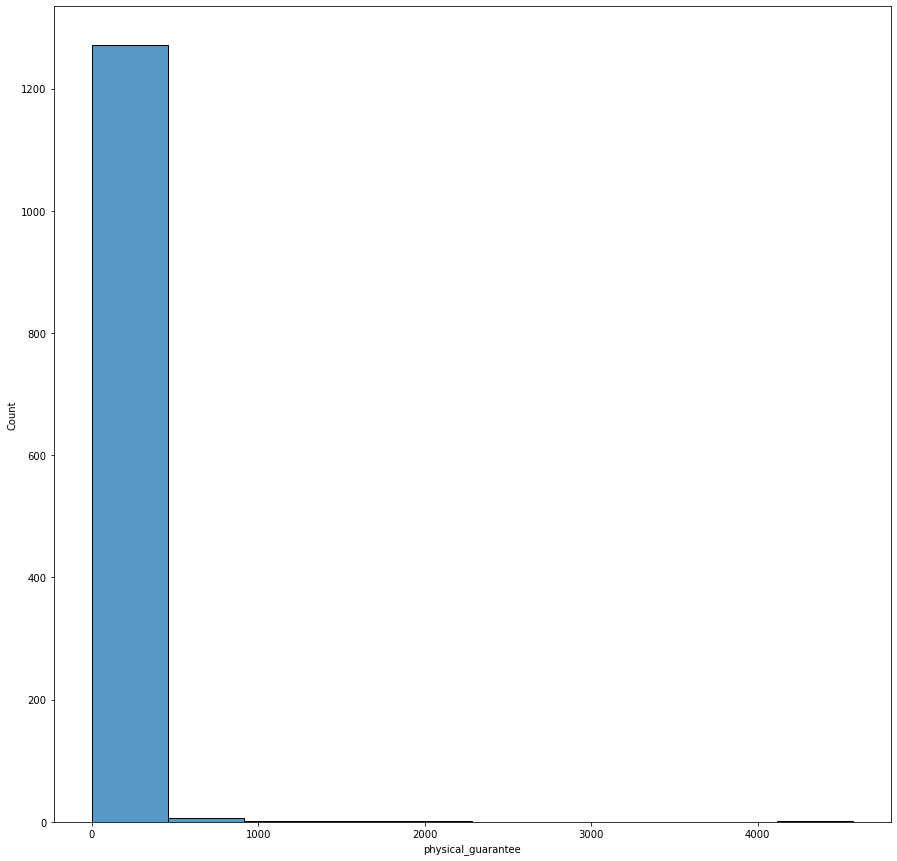

In [34]:
plt.figure(figsize=(15, 15))
sns.histplot(df2['physical_guarantee'], bins=10)
plt.show()

### This plots shows the distribution of physical guarantees sizes (with bins)
***

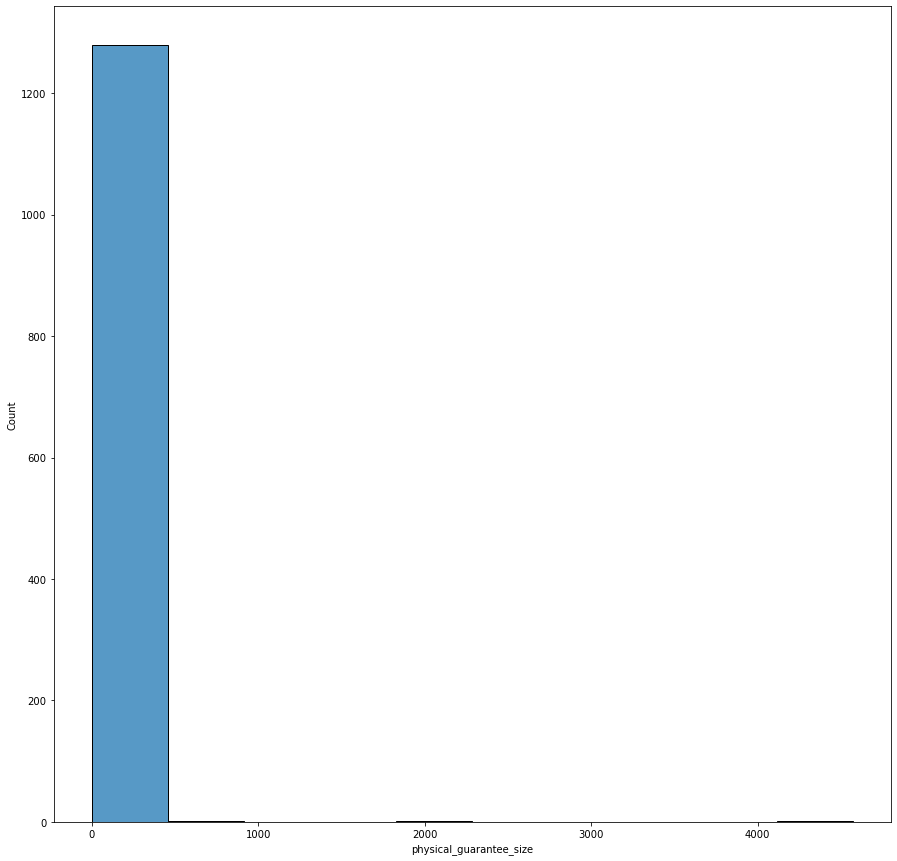

In [35]:
plt.figure(figsize=(15, 15))
sns.histplot(df2['physical_guarantee_size'], bins=10)
plt.show()

### This plots shows the distribution of winning bids according to the source
***
#### The majority of winning bids were in wind projects, followed by hydro, solar and sugar cane bagasse

<AxesSubplot:xlabel='source', ylabel='Count'>

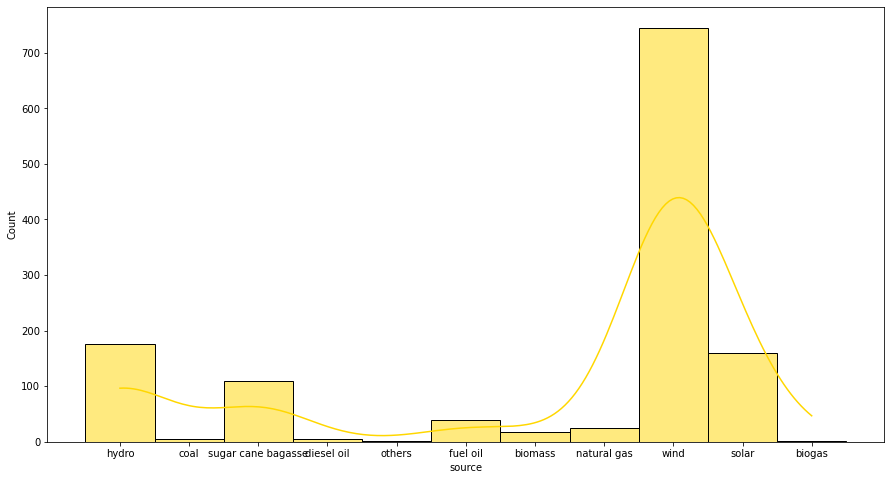

In [36]:
plt.figure(figsize=(15, 8))
sns.histplot(x=df2["source"] , color="gold", kde=True)

### This plots shows the distribution of states in which there were winning bids
***

#### The majority of winning bids are in Northeastern states (BA, CE, RN), where there are many approved wind power generation projects

<AxesSubplot:xlabel='state', ylabel='Count'>

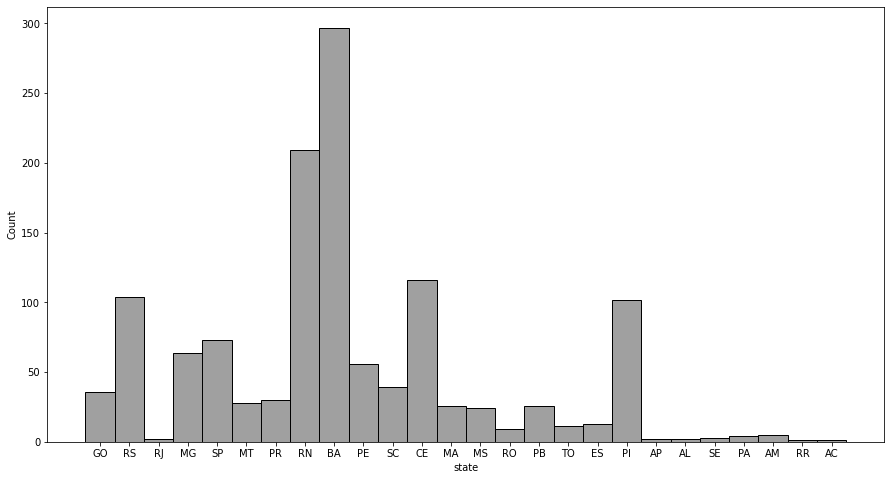

In [37]:
plt.figure(figsize=(15, 8))
sns.histplot(x=df2["state"] , color="grey")


### Obtaining boxplots for price, investments, physical guarantee and physical guarantee size
***

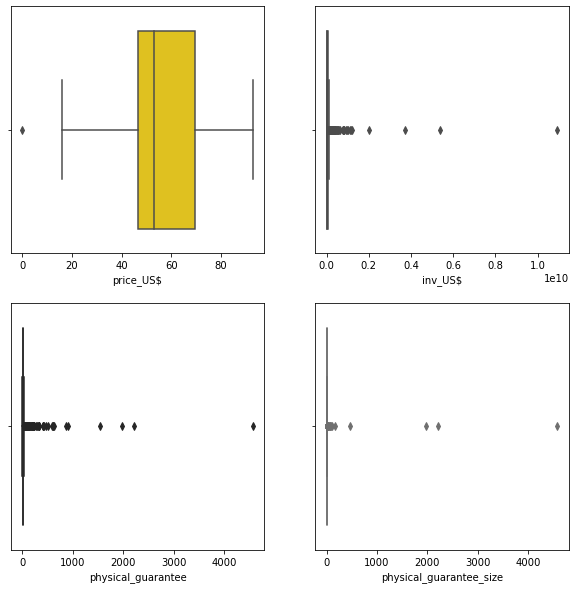

In [38]:
f, axes = plt.subplots(2, 2, figsize=(10, 10), sharex=False);
sns.boxplot(x=df2["price_US$"] , color="gold", ax=axes[0, 0]);
sns.boxplot(x=df2["inv_US$"] , color="gold", ax=axes[0, 1]);
sns.boxplot(x=df2["physical_guarantee"], color="olive", ax=axes[1, 0]);
sns.boxplot(x=df2["physical_guarantee_size"] , color="skyblue", ax=axes[1, 1]);


### A boxplots that combines the variables source and size
***
#### What this graph is telling us is that for some sources there tend to be more approved bids per auction. 

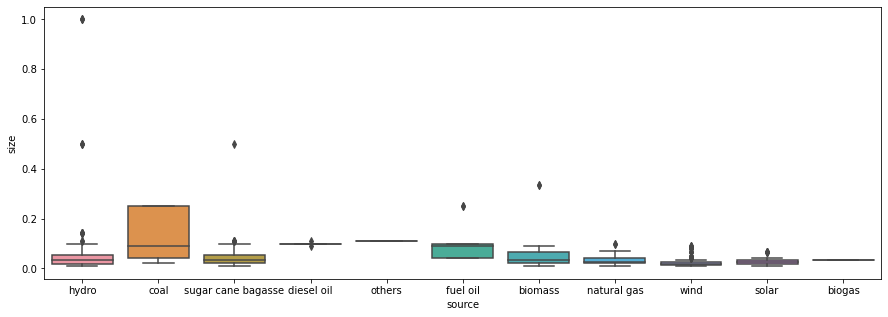

In [40]:
plt.figure(figsize=(15, 5))
sns.boxplot(x ='source',y='size', data=df2)
plt.show()

### A boxplots that combines the variables state and size
***
#### What this graph is telling us is that some states, chiefly "PA" (Pará), tend to have very large projects that "occupy" one entire auction.

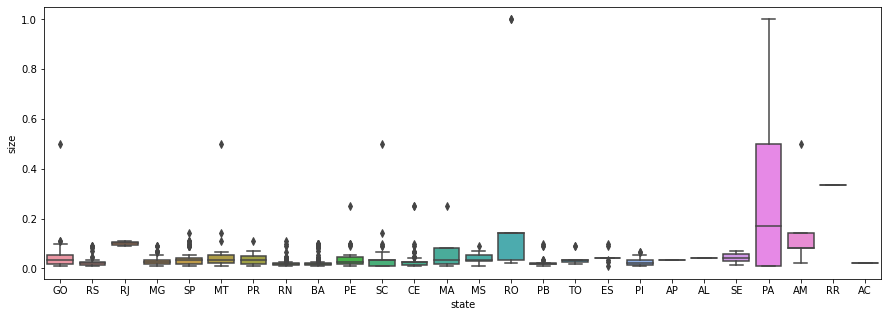

In [41]:
plt.figure(figsize=(15, 5))
sns.boxplot(x ='state',y='size', data=df2)
plt.show()

In [ ]:
# Now we export the dataframe to a new csv file that will be used in the modelling process
df2.to_csv('firstout.csv')


***